## Classification of all types or classes
#### 0- Non-neoplastic,
#### 1- Neoplastic
#### 2- Normal
#### 3- Carcinom

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
model_features = pd.read_csv("ihc-files/ihc-all-features.csv")
model_features

,Ki67,braf,PDL epitel,PDL lenfos,vegf,cd34,cd34 score,P53
0,50,Negative,Negative,Negative,20,47,2,15
1,40,Negative,Negative,Negative,30,39,2,10
2,50,Negative,Negative,Negative,50,50,3,20
3,50,Negative,Negative,Weak,40,63,3,5
4,60,Negative,Negative,Weak,70,57,2,25
...,...,...,...,...,...,...,...,...
378,70,Negative,Negative,Negative,10,30,1,40
379,75,Negative,Negative,Intermediate,55,37,2,30
380,80,Negative,Negative,Weak,60,40,2,35
381,70,Negative,Negative,Intermediate,50,36,2,35


In [3]:
labels_df = pd.read_csv("ihc-files/ihc-all-labels.csv")
labels_df

,Type
0,nonneoplastic
1,nonneoplastic
2,nonneoplastic
3,nonneoplastic
4,neoplastic
...,...
378,neoplastic
379,neoplastic
380,neoplastic
381,neoplastic


In [8]:
target_names = list(labels_df.Type)
target = []
for i in target_names:
    if i == 'nonneoplastic':
        target.append(0)
    elif i == "neoplastic":
        target.append(1)
    elif i == "normal":
        target.append(2)
    else:
        target.append(3)

In [9]:
len(target)

383

In [10]:
labels_df["Target"] = target
labels_df

,Type,Target
0,nonneoplastic,0
1,nonneoplastic,0
2,nonneoplastic,0
3,nonneoplastic,0
4,neoplastic,1
...,...,...
378,neoplastic,1
379,neoplastic,1
380,neoplastic,1
381,neoplastic,1


In [11]:
dummies = pd.get_dummies(model_features[["braf", "PDL epitel", "PDL lenfos"]], drop_first=True)
dummies 

,braf_Weak,braf_kuvvetli,PDL epitel_Negative,PDL epitel_Weak,PDL epitel_kuvvetli,PDL lenfos_Negative,PDL lenfos_Weak,PDL lenfos_kuvvetli
0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,1,0,0
3,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
378,0,0,1,0,0,1,0,0
379,0,0,1,0,0,0,0,0
380,0,0,1,0,0,0,1,0
381,0,0,1,0,0,0,0,0


In [12]:
dummies["Ki67"] = model_features.Ki67
dummies["vegf"] = model_features.vegf
dummies["cd34"] = model_features.cd34
dummies["cd34 score"] = model_features["cd34 score"]
dummies["P53"] = model_features.P53
dummies

,braf_Weak,braf_kuvvetli,PDL epitel_Negative,PDL epitel_Weak,PDL epitel_kuvvetli,PDL lenfos_Negative,PDL lenfos_Weak,PDL lenfos_kuvvetli,Ki67,vegf,cd34,cd34 score,P53
0,0,0,1,0,0,1,0,0,50,20,47,2,15
1,0,0,1,0,0,1,0,0,40,30,39,2,10
2,0,0,1,0,0,1,0,0,50,50,50,3,20
3,0,0,1,0,0,0,1,0,50,40,63,3,5
4,0,0,1,0,0,0,1,0,60,70,57,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0,0,1,0,0,1,0,0,70,10,30,1,40
379,0,0,1,0,0,0,0,0,75,55,37,2,30
380,0,0,1,0,0,0,1,0,80,60,40,2,35
381,0,0,1,0,0,0,0,0,70,50,36,2,35


In [14]:
dummies.isna().sum()

braf_Weak              0
braf_kuvvetli          0
PDL epitel_Negative    0
PDL epitel_Weak        0
PDL epitel_kuvvetli    0
PDL lenfos_Negative    0
PDL lenfos_Weak        0
PDL lenfos_kuvvetli    0
Ki67                   0
vegf                   0
cd34                   0
cd34 score             0
P53                    0
dtype: int64

In [15]:
X = dummies
y = labels_df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
clf.score(X_train, y_train)

1.0

In [18]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1,
       0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0,
       1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2], dtype=int64)

In [19]:
clf.score(X_test, y_test)

0.7662337662337663

### Cross validation 10 fold

In [21]:
clf_cv_score = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
clf_cv_score

array([0.66666667, 0.66666667, 0.74358974, 0.65789474, 0.81578947,
       0.73684211, 0.73684211, 0.86842105, 0.76315789, 0.76315789])

In [22]:
clf_cv_score.mean()

0.7419028340080972

In [23]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.50      0.47      0.48        17
           1       0.90      0.90      0.90        48
           2       0.62      0.73      0.67        11
           3       0.00      0.00      0.00         1

    accuracy                           0.77        77
   macro avg       0.50      0.52      0.51        77
weighted avg       0.76      0.77      0.76        77



C:\Users\tajud\Capstone\envs\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tajud\Capstone\envs\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tajud\Capstone\envs\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


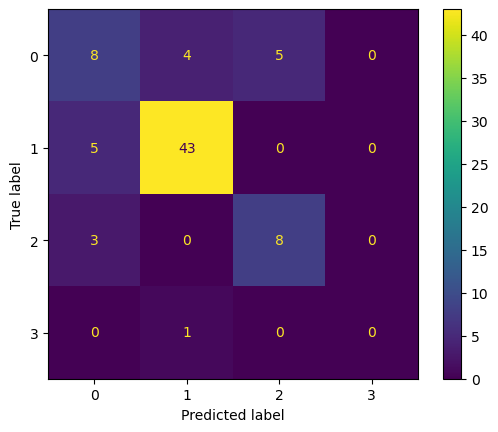

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()